<a href="https://colab.research.google.com/github/ronkiks/SALARIES/blob/main/SuperStoreUS_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Documentation
1. import numpy as np: is a widely used alias for NumPy, making it easier to refer to NumPy functions and objects in your code.it is useful linear algebra, Fourier transform, and random number capabilities.
2. import pandas as pd: provides data structures like DataFrames and Series for efficiently storing and manipulating data.
3. import matplotlib.pyplot as plt: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python While pyplot is a collection of functions that make Matplotlib work like MATLAB abd it provides a convenient interface for creating various types of plots.

In [12]:
data = pd.read_excel("/content/SuperStoreUS-2015.xlsx")
data

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


## Documentation:
The pd.read_excel() function has many parameters to customize how the data is read. Some of the key ones include:
- io: The path to the Excel file (or a file-like object).
- sheet_name: The name of the sheet to read (defaults to the first sheet). You can also pass an integer for sheet index or a list to read multiple sheets.
- header: The row number(s) to use as the column names (defaults to 0, the first row).
- index_col: The column number(s) to use as the row labels (index).
- usecols: Specifies which columns to read (can be a list of column names or indices).
- dtype: A dictionary specifying data types for specific columns.
na_values: Values to consider as missing data (NaN).



# 1. Total Revenue:

In [ ]:
total_revenue = data['Sales'].sum()
# Assuming 'Sales' column contains the sales figures for each transaction
print(f"Total revenue: {total_revenue}")

Total revenue: 1924337.88


## Documentation:
 The statement "Total revenue: 1924337.88" signifies that, based on the data you provided, the store has generated a total revenue of 1924337.88 (in whatever currency your data uses). This is a key performance indicator for any business, representing the overall income generated from its primary operations.


# 2. Top Selling Category:

In [ ]:
category_sales = data.groupby('Product Category')['Sales'].sum()
# Assuming 'Category' column indicates product categories
top_category = category_sales.idxmax()
print(f"Top selling category: {top_category}")

Top selling category: Technology


## Documentation:
The statement "Top selling category: Technology" means that, based on your sales data analysis, products in the "Technology" category have generated the highest total revenue compared to other product categories in your store. This insight can be valuable for business decisions such as inventory management, marketing strategies, and product promotions.

# 3. Sales Trend for the Past Year:

<ipython-input-22-4bff60087a3d>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = past_year_data.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum()


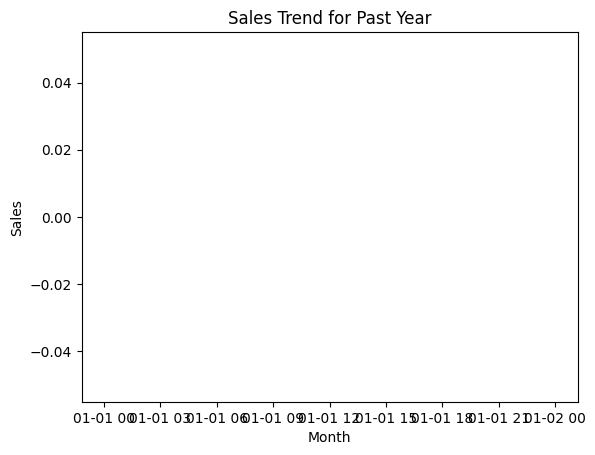

In [ ]:
# Assuming you have a 'Date' column in your data
data['Date'] = pd.to_datetime(data['Order Date']) # Convert 'Date' to datetime objects

# Filter data for the past year
past_year_data = data[data['Date'] >= pd.Timestamp.now() - pd.DateOffset(years=1)]

# Group data by month and calculate total sales
monthly_sales = past_year_data.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].sum()

# Plot the sales trend
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Trend for Past Year")
plt.show()

## Documentation:
This warning is essentially a heads-up from the pandas library. It's saying:

"Hey, you're using 'M' to group your data by month, but that's going to be removed in the future. You should start using 'ME' instead, which is more specific and clear."

In simpler terms:

'M' was previously used to represent "month end" frequency when grouping data in pandas.
However, pandas is making its date and time frequencies more consistent and explicit.
'ME' is now the preferred and recommended way to specify "month end" frequency.
The warning is letting you know that 'M' will eventually stop working, so it's best to update your code now.

# 4. Regions with Highest and Lowest Sales:

In [ ]:
region_sales = data.groupby('Region')['Sales'].sum()
# Assuming 'Region' column indicates sales regions
highest_sales_region = region_sales.idxmax()
lowest_sales_region = region_sales.idxmin()
print(f"Region with highest sales: {highest_sales_region}")
print(f"Region with lowest sales: {lowest_sales_region}")

Region with highest sales: East
Region with lowest sales: South


# Documentation:
These statements provide valuable insights into the sales performance across different regions.
- "Region with highest sales: East" suggests that the East region is a strong market for your products, potentially indicating opportunities for further investment or expansion in that area.
- "Region with lowest sales: South" might indicate areas needing improvement, such as targeted marketing campaigns or adjustments to sales strategies in the South region.

# 5. Average Profit Margin:

In [13]:
total_profit = data['Profit'].sum()
total_sales = data['Sales'].sum()
average_profit_margin = (total_profit / total_sales) * 100
print(f"Average profit margin: {average_profit_margin:.2f}%")

Average profit margin: 11.64%


## Documentation:
The statement "Average profit margin: 11.64%" signifies that, on average, the store earns a profit of 11.64% on its sales. This is a measure of the store's overall profitability and efficiency in generating profits from its sales. A higher profit margin generally indicates better financial performance.